# Ripple


Our goal in this notebook is not to predict, as accurately as possible, the price of bitcoin tomorrow. Instead we want to see how we can use a machine learning algorithm called Random Forest to create a model that can predict bitcoin prices using historical data on bitcoin supply and demand.

# How Random Forest Works

Random Forest will make use of decision trees to understand how these factors affected ripple prices in the past. Simply put, a decision tree is a flowchart-like mapping of inputs and outputs.

The patterns from these decision trees are what would dictate our price prediction model. The more data we can feed the Random Forest algorithm, the more opportunities it would have in finding new patterns and verifying existing patterns. It will then average the predictions of each tree to create a more reliable prediction. We will test how the predicted values fare out against the actual values. This means, we will save some data points from our dataset to test the predictions of the Random Forest algorithm.

Before we do that, let’s first see what’s in our dataset.

# Quick Data Exploration

Our dataset has 1,662 rows. These represent all the days between Aug 04, 2013 to Feb 20, 2018.

In [12]:
import pandas as pd
import os
import seaborn as sns

In [10]:
ripple = pd.read_csv('ripple_price.csv',parse_dates=['Date'])
ripple.shape

(1662, 7)

In [11]:
ripple.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,1.14,1.17,1.08,1.09,"806,673,000","44,648,100,000"
1,2018-02-19,1.12,1.17,1.12,1.14,"556,304,000","43,813,300,000"
2,2018-02-18,1.20,1.21,1.09,1.12,"1,113,650,000","46,997,500,000"
3,2018-02-17,1.14,1.22,1.13,1.20,"1,186,730,000","44,370,200,000"
4,2018-02-16,1.14,1.15,1.11,1.14,"568,339,000","44,663,300,000"


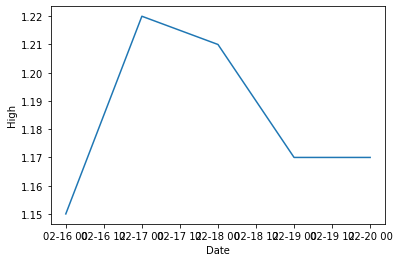

In [35]:
sns.lineplot(x="Date", y="High",data=ripple[:5]);

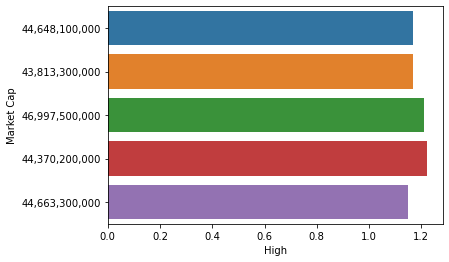

In [38]:
sns.barplot(x="High", y="Market Cap", data=ripple[:5])

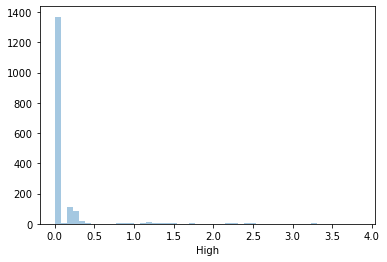

In [40]:
sns.distplot(ripple['High'],kde = False)

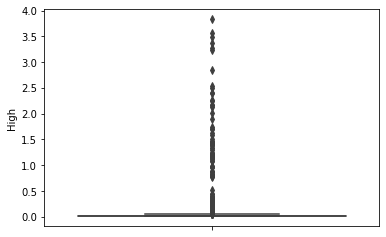

In [41]:
sns.boxplot(ripple['High'], orient='vertical')

In [52]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
#importing packages for the prediction of time-series data
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error



In [45]:
crypto_data = {}


crypto_data['ripple'] = pd.read_csv("ripple_price.csv", parse_dates=['Date'])

AttributeError: module 'seaborn' has no attribute 'tsplot'

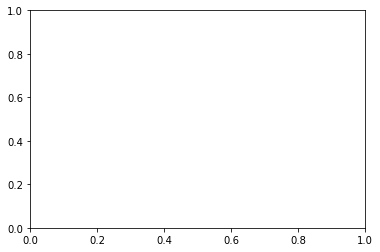

In [53]:
    df = pd.DataFrame(crypto_data['ripple'])
    df = df[['Date' , 'Close']]
    
    df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x)) # making new column 'Date_mpl' by using date2num lamba function
    fig, ax = plt.subplots(figsize=(6,4))
    sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[3], ax=ax)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    fig.autofmt_xdate()
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    title_str = "Closing price distribution of " + coin
    plt.title(title_str, fontsize=15)
    plt.show()

In [55]:
df_ripple = pd.DataFrame(crypto_data['ripple'])

df_ripple = df_ripple[['Date','Close']]
df_ripple.set_index('Date', inplace = True)

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1661
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2799.596
Method:                       css-mle   S.D. of innovations              0.045
Date:                Sun, 31 Jan 2021   AIC                          -5585.191
Time:                        14:14:52   BIC                          -5547.285
Sample:                             1   HQIC                         -5571.142
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0006      0.001     -0.465      0.642      -0.003       0.002
ar.L1.D.Close     0.0744      0.025      3.033      0.002       0.026       0.123
ar.L2.D.Close     0.0387      0.025     

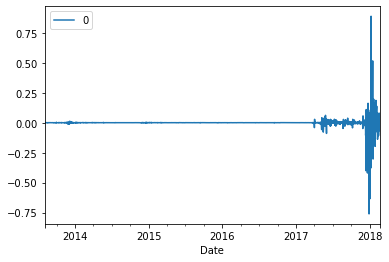

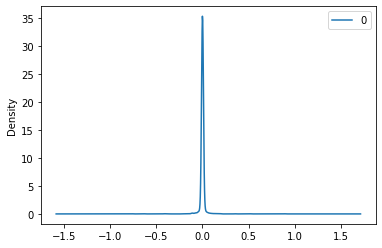

                 0
count  1661.000000
mean     -0.000008
std       0.044864
min      -0.761387
25%       0.000318
50%       0.000531
75%       0.000747
max       0.889501


In [56]:
# fit model
model = ARIMA(df_ripple, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Test MSE: 0.000


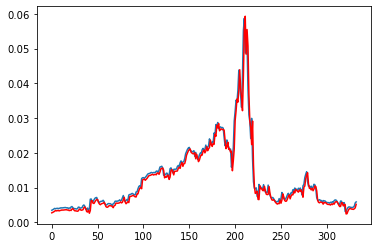

In [60]:
X = df_ripple.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()